# Project: House Price Prediction

# Step 0: Importing Libraries

In [19]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')

In [20]:
#importing dataset
data = pd.read_csv("dataset.csv")

# Step 1: Descriptive Statistics

In [21]:
#Preview data
data.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


In [22]:
# Dataset dimensions (rows, columns)
data.shape

(4600, 18)

In [23]:
# Features (columns) data-types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [24]:
# Checking the number of missing values
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [25]:
# Statistical summary
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


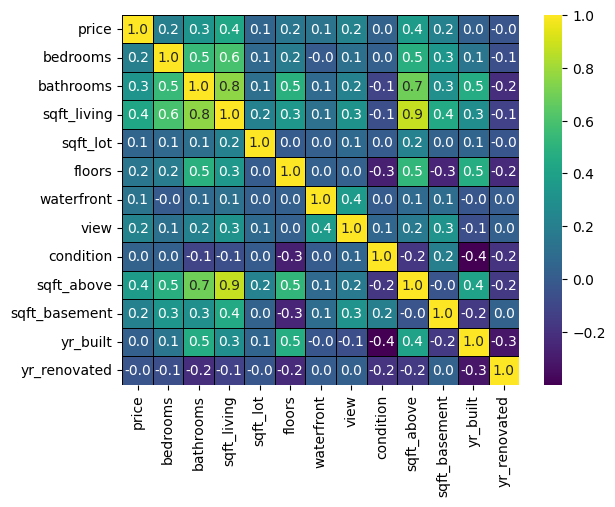

In [26]:
# Heatmap
df=data.select_dtypes("number")
sns.heatmap(df.corr(), cmap='viridis', annot=True, fmt='.1f', cbar=True, linewidths=0.6, linecolor='Black')
plt.show()

From the correlation heatmap, we can see that there is a high correlation between Price and [bedrooms, bathrooms, sqft_living, floors, view, sqft_above, sqft_basement]. We can select these features to accept input from the user and predict the outcome.

In [27]:
# Dropping all the columns having least correlation with the target variable
data = data.drop(['sqft_lot', 'waterfront', 'condition', 'yr_built', 'yr_renovated'], axis=1)

In [28]:
data['country'].value_counts()

country
USA    4600
Name: count, dtype: int64

As the 'country' column has only one unique value, it will have no effect on the target variable. 'date' & 'view' features also have no effect on the target.
Therefore, I will drop these columns.

From the dataset we can understand that the 'statezip' and 'street' columns are not important to predict house prices. So I will drop those columns as well.

In [29]:
data.drop(['country', 'date'], axis=1, inplace=True)

In [30]:
data.head()

,price,bedrooms,bathrooms,sqft_living,floors,view,sqft_above,sqft_basement,street,city,statezip
0,313000.0,3.0,1.50,1340,1.5,0,1340,0,18810 Densmore Ave N,Shoreline,WA 98133
1,2384000.0,5.0,2.50,3650,2.0,4,3370,280,709 W Blaine St,Seattle,WA 98119
2,342000.0,3.0,2.00,1930,1.0,0,1930,0,26206-26214 143rd Ave SE,Kent,WA 98042
3,420000.0,3.0,2.25,2000,1.0,0,1000,1000,857 170th Pl NE,Bellevue,WA 98008
4,550000.0,4.0,2.50,1940,1.0,0,1140,800,9105 170th Ave NE,Redmond,WA 98052


# Step 2: Feature Engineering

In [31]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,floors,view,sqft_above,sqft_basement
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.512065,0.240652,1827.265435,312.081522
std,5.638347e+05,0.908848,0.783781,963.206916,0.538288,0.778405,862.168977,464.137228
min,0.000000e+00,0.000000,0.000000,370.000000,1.000000,0.000000,370.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,1.000000,0.000000,1190.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,1.500000,0.000000,1590.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,2.000000,0.000000,2300.000000,610.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,3.500000,4.000000,9410.000000,4820.000000


In [34]:
data

,price,bedrooms,bathrooms,sqft_living,floors,view,sqft_above,sqft_basement,street,city,statezip
0,3.130000e+05,3.0,1.50,1340,1.5,0,1340,0,18810 Densmore Ave N,Shoreline,WA 98133
1,2.384000e+06,5.0,2.50,3650,2.0,4,3370,280,709 W Blaine St,Seattle,WA 98119
2,3.420000e+05,3.0,2.00,1930,1.0,0,1930,0,26206-26214 143rd Ave SE,Kent,WA 98042
3,4.200000e+05,3.0,2.25,2000,1.0,0,1000,1000,857 170th Pl NE,Bellevue,WA 98008
4,5.500000e+05,4.0,2.50,1940,1.0,0,1140,800,9105 170th Ave NE,Redmond,WA 98052
...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,1.0,0,1510,0,501 N 143rd St,Seattle,WA 98133
4596,5.343333e+05,3.0,2.50,1460,2.0,0,1460,0,14855 SE 10th Pl,Bellevue,WA 98007
4597,4.169042e+05,3.0,2.50,3010,2.0,0,3010,0,759 Ilwaco Pl NE,Renton,WA 98059
4598,2.034000e+05,4.0,2.00,2090,1.0,0,1070,1020,5148 S Creston St,Seattle,WA 98178


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   floors         4600 non-null   float64
 5   view           4600 non-null   int64  
 6   sqft_above     4600 non-null   int64  
 7   sqft_basement  4600 non-null   int64  
 8   street         4600 non-null   object 
 9   city           4600 non-null   object 
 10  statezip       4600 non-null   object 
dtypes: float64(4), int64(4), object(3)
memory usage: 395.4+ KB


### Encoding the Categorical Data

In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['street'] = le.fit_transform(data['street'])
data['city'] = le.fit_transform(data['city'])
data['statezip'] = le.fit_transform(data['statezip'])

### Removing outliers from the dataset

In [60]:
# Calculate z-scores for numerical features
z_scores = (data - data.mean()) / data.std()

# Set threshold for outlier detection
threshold = 3

# Identify outliers
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Remove outliers from dataset
data = data[~outliers.any(axis=1)]

### Selecting features and target

In [61]:
# Splitting the features and target
X = data.drop(['price'], axis=1)
Y = data['price']

In [62]:
X

,bedrooms,bathrooms,sqft_living,floors,view,sqft_above,sqft_basement,street,city,statezip
0,3.0,1.50,1340,1.5,0,1340,0,1522,36,62
2,3.0,2.00,1930,1.0,0,1930,0,2291,18,26
3,3.0,2.25,2000,1.0,0,1000,1000,4263,3,7
4,4.0,2.50,1940,1.0,0,1140,800,4352,31,31
5,2.0,1.00,880,1.0,0,880,0,3521,35,54
...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,1.0,0,1510,0,3447,35,62
4596,3.0,2.50,1460,2.0,0,1460,0,960,3,6
4597,3.0,2.50,3010,2.0,0,3010,0,4033,32,37
4598,4.0,2.00,2090,1.0,0,1070,1020,3498,35,71


In [63]:
Y

0       313000.000000
2       342000.000000
3       420000.000000
4       550000.000000
5       490000.000000
            ...      
4595    308166.666667
4596    534333.333333
4597    416904.166667
4598    203400.000000
4599    220600.000000
Name: price, Length: 3972, dtype: float64

### Train Test Split

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [65]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (3177, 10)
X_test shape: (795, 10)
Y_train shape: (3177,)
Y_test shape: (795,)


### Feature scaling using Standardization

In [66]:
#  Feature scaling using Standardization
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
X_train

array([[ 0.86809965,  0.69907064,  0.08129703, ...,  1.59412007,
        -1.80329801, -1.4392253 ],
       [-0.34907711, -1.528429  , -1.15869442, ...,  1.4084317 ,
         0.77052949,  0.51430742],
       [ 0.86809965,  0.69907064,  0.54561101, ..., -0.06403107,
        -0.43059001, -0.75548885],
       ...,
       [-1.56625386, -1.528429  , -0.28742289, ...,  1.33016635,
         0.77052949,  1.10036724],
       [-0.34907711,  0.69907064,  1.25573827, ..., -0.9771268 ,
        -2.14647501,  0.31895415],
       [ 2.0852764 ,  1.81282046,  1.2011131 , ...,  1.33323558,
         0.77052949,  0.90501396]])

In [68]:
X_test

array([[-1.56625386, -0.78592912, -1.01120645, ...,  0.25286686,
         0.77052949,  1.24688219],
       [ 0.86809965,  0.69907064,  1.48789526, ...,  0.38561102,
        -1.97488651, -1.73225521],
       [-0.34907711, -0.41467918,  0.32711031, ..., -0.63797696,
         0.85632374,  1.5399121 ],
       ...,
       [-0.34907711, -1.528429  , -1.3116449 , ..., -0.68171348,
         0.77052949,  0.75849901],
       [ 0.86809965,  2.1840704 ,  1.70639596, ..., -1.52805346,
        -0.85956126, -1.14619539],
       [-1.56625386, -0.04342924, -0.53323618, ...,  0.60659554,
         0.77052949,  0.41663078]])

# Step 4: Data Modelling

### 1. Linear Regression

In [69]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
y_pred_lr = lr.predict(X_test)

### 2. Random Forest

In [70]:
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)
y_pred_rf = rf.predict(X_test)

### 3. Bayesian Ridge Regression

In [71]:
br = BayesianRidge(n_iter=400)
br.fit(X_train, Y_train)
y_pred_br = br.predict(X_test)

### 4. Gradient Boosting Regression

In [72]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, Y_train)
y_pred_gbr = gbr.predict(X_test)

### 5. XGBoost Regression

In [73]:
xgb = XGBRegressor()
xgb.fit(X_train, Y_train)
y_pred_xgb = xgb.predict(X_test)

### 6. KNN Regresssion

In [74]:
knr = KNeighborsRegressor()
knr.fit(X_train, Y_train)
y_pred_knr = knr.predict(X_test)

### 7. Support Vector Machine

In [75]:
svr = SVR(kernel='rbf')  
svr.fit(X_train, Y_train)  
y_pred_svr = svr.predict(X_test)

# Step 5: Model Evaluation

In [76]:
# Evaluating using r2_score metric
from sklearn.metrics import r2_score
r2score_lr = r2_score(Y_test, y_pred_lr)
r2score_rf = r2_score(Y_test, y_pred_rf)
r2score_br = r2_score(Y_test, y_pred_br)
r2score_gbr = r2_score(Y_test, y_pred_gbr)
r2score_xgb = r2_score(Y_test, y_pred_xgb)
r2score_knr = r2_score(Y_test, y_pred_knr)
r2score_svr = r2_score(Y_test, y_pred_svr)

In [77]:
# R2 Score on test set
print(f"Linear Regression: {r2score_lr}")
print(f"Random Forest: {r2score_rf}")
print(f"Bayesian Ridge Regression: {r2score_br}")
print(f"Gradient Boosting Regression: {r2score_gbr}")
print(f"XGBoost Regression: {r2score_xgb}")
print(f"KNN: {r2score_knr}")
print(f"Support Vector Machine: {r2score_svr}")

Linear Regression: 0.4540230379756526
Random Forest: 0.7171409461706559
Bayesian Ridge Regression: 0.4535734456091238
Gradient Boosting Regression: 0.6914185189186715
XGBoost Regression: 0.7225055820185573
KNN: 0.4836504533962829
Support Vector Machine: -0.0282886185573743


# Conclusion:
1. It has been observed that R2 score of XGBoost model is highest.
2. Therefore, we will choose the XGBoost Regression model to predict house prices.

## Hyperparameter Tuning of XGBoost Model

In [78]:
from sklearn.model_selection import GridSearchCV
xgb = XGBRegressor()

xgb_param = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of boosting rounds
    'learning_rate': [0.05, 0.1, 0.2],  # Step size shrinkage
    'max_depth': [3, 4, 5],  # Maximum depth of a tree
    'min_child_weight': [1, 2, 3],  # Minimum sum of instance weight (hessian) needed in a child
    'gamma': [0, 0.1, 0.2],  # Minimum loss reduction required to make a further partition on a leaf node
    'subsample': [0.6, 0.7, 0.8],  # Subsample ratio of the training instances
    'colsample_bytree': [0.6, 0.7, 0.8]  # Subsample ratio of columns when constructing each tree
}

grid_search = GridSearchCV(estimator=xgb, param_grid=xgb_param, cv=7, scoring='r2', verbose=2, n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_xgb = XGBRegressor(**best_params)
best_xgb.fit(X_train, Y_train)

# Make predictions on the testing set
y_pred_xgbr = best_xgb.predict(X_test)

Fitting 7 folds for each of 3645 candidates, totalling 25515 fits


In [82]:
r2_score(Y_test, y_pred_xgbr)

0.7458453843007758

## Hyperparameter Tuning of Random Forest Model

In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid
rf_params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create Random Forest Regressor
rf = RandomForestRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=rf_params, cv=7, scoring='r2')
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_rf = XGBRegressor(**best_params)
best_rf.fit(X_train, Y_train)

# Make predictions on the testing set
y_pred_rf = best_rf.predict(X_test)

In [79]:
r2_score(Y_test, y_pred_rf)

0.7171409461706559

In [80]:
import pickle

In [84]:
pickle.dump(best_xgb, open('HousePricePrediction.pkl', 'wb'))